# 4.02 Data Consistency Checks
### 01. Importing Libraries
### 02. Importing Data
### 03. Products Data Consistency
### 04. Orders Data Consistency

# 01. Importing Libraries

In [1]:
#Import libraries - pandas, Numpy, OS
import pandas as pd
import numpy as np
import os

# 02. Importing Data

In [2]:
#Creating a path to the root directory for this project
path = r'C:\Users\theva\OneDrive\CareerFoundry\Data Immersion\A4\Instacart Basket Analysis 11-2022'

In [3]:
#Importing orders.csv to df via pandas.read_csv and os.path.join
df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_wrangled.csv'))

In [4]:
#Importing products.csv to df_prods
df_prods = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'), index_col = False)

In [5]:
#Drop extra index and resetting index
df_ords = df_ords.reset_index(drop = True)
df_ords = df_ords.drop(columns = 'Unnamed: 0')

In [6]:
#Changing a variable's data type
df_ords['order_id'] = df_ords['order_id'].astype('str')
df_ords['user_id'] = df_ords['user_id'].astype('str')

# 03. Data Consistency

## Mixed Data Types

In [7]:
#Create test dataframe
df_test = pd.DataFrame()

In [41]:
#Create a mixed column type
df_test['mix'] = ['a', 'b', 1, True]

In [42]:
#Check for mixed data types
for col in df_test.columns.tolist():
  weird = (df_test[[col]].applymap(type) != df_test[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_test[weird]) > 0:
    print (col, ' mixed')
  else: print(col, ' consistent')

mix  mixed


In [43]:
#Changing 'mix' to string type
df_test['mix'] = df_test['mix'].astype('str')

In [44]:
#Re-check for mixed data types
for col in df_test.columns.tolist():
  weird = (df_test[[col]].applymap(type) != df_test[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_test[weird]) > 0:
    print (col, ' mixed')
  else: print(col, ' consistent')

mix  consistent


## Missing Values

In [7]:
#Count the missing values in each col
df_prods.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

In [8]:
#Missing values list
df_nanprods = df_prods[df_prods.product_name.isnull() == True]

In [9]:
#Create df w/o nan values
df_prods_clean = df_prods[df_prods['product_name'].isnull() == False]

In [10]:
df_prods_clean.shape

(49677, 5)

## Duplicates

In [11]:
#Create duplicates df
df_dups = df_prods_clean[df_prods_clean.duplicated()]

In [12]:
#Create dropped dups list
df_prods_clean_no_dups = df_prods_clean.drop_duplicates()

In [13]:
df_prods_clean_no_dups.shape

(49672, 5)

## Outliers

In [20]:
#Check for anything unusual in df_prods summary statistics
df_prods.describe()

,product_id,aisle_id,department_id,prices
count,49693.000000,49693.000000,49693.000000,49693.000000
mean,24844.345139,67.770249,11.728433,9.994136
std,14343.717401,38.316774,5.850282,453.519686
min,1.000000,1.000000,1.000000,1.000000
25%,12423.000000,35.000000,7.000000,4.100000
50%,24845.000000,69.000000,13.000000,7.100000
75%,37265.000000,100.000000,17.000000,11.200000
max,49688.000000,134.000000,21.000000,99999.000000


The max value for 'prices' is 99999. This could be an error or a placeholder for missing values.

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='product_id', ylabel='prices'>

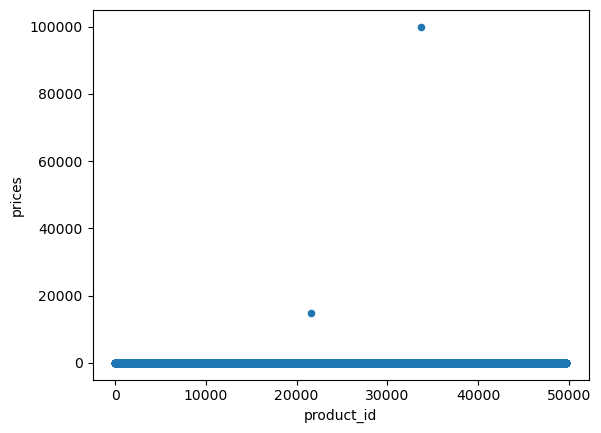

In [15]:
df_prods.plot.scatter('product_id', 'prices')

In [16]:
df_prods[df_prods.prices >= 10000]

,product_id,product_name,aisle_id,department_id,prices
21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
33666,33664,2 % Reduced Fat Milk,84,16,99999.0


### Outliers: product_id 21553 and 33664

# 04. Orders Data Consistency
##### Note: Some checks previously conducted on this set, remainging checks perfromed below

## Mixed data types

In [8]:
#Check for mixed type data in df_ords
for col in df_ords.columns.tolist():
  weird = (df_ords[[col]].applymap(type) != df_ords[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_ords[weird]) > 0:
    print (col, ' mixed')
  else: print(col, ' consistent')

order_id  consistent
user_id  consistent
order_number  consistent
orders_day_of_week  consistent
order_hour_of_day  consistent
days_since_prior_order  consistent


No mixed data types found.

## Missing Values

In [9]:
#Check for missing values in df_ords
df_ords.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
orders_day_of_week             0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [58]:
#Checking head
df_ords.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
5,3367565,1,6,2,7,19.0
6,550135,1,7,1,9,20.0
7,3108588,1,8,1,14,14.0
8,2295261,1,9,1,16,0.0
9,2550362,1,10,4,8,30.0


In [55]:
#Changing to user_id to int type to assist missing value inquiry
df_ords['user_id'] = df_ords['user_id'].astype('int64')
df_ords.user_id.max()

206209

'days_since_prior_order' has 206,209 missing values. Since the first entry of user_id = 1 and 2 had a NaN value for 'days_since_prior_order' I theorized that the first transaction of every user would have a NaN value for 'days_since_prior_order'. If the largest user_id is equal to the number of missing values, then the theory is likely true. The max value for user_id = 206,209 (the same as the number of missing values).

In [62]:
#Summary statistics
df_ords.days_since_prior_order.describe()

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [63]:
#Data spread
df_ords['days_since_prior_order'].value_counts()

30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: days_since_prior_order, dtype: int64

In [10]:
#Adressing the missing values from step 5.
df_ords['days_since_prior_order'].fillna(999, inplace=True)

I imputed a flag value of '999' for all NaN entries in 'days_since_prior_order' so it would not affect analysis results regarding purchase frequency. The high frequency of '30' values (likely due a default value entered at the end of the month, or from customers with monthly recurring orders) stretched the mean, making it a poor imputation. '7' is the median is already the second most frequent value - 30% larger than the third most frequent. Adding all NaN values to this could skew analysis results.

In [13]:
#Checking changes
df_ords['days_since_prior_order'].value_counts()

30.0     369323
7.0      320608
6.0      240013
4.0      221696
3.0      217005
5.0      214503
999.0    206209
2.0      193206
8.0      181717
1.0      145247
9.0      118188
14.0     100230
10.0      95186
13.0      83214
11.0      80970
12.0      76146
0.0       67755
15.0      66579
16.0      46941
21.0      45470
17.0      39245
20.0      38527
18.0      35881
19.0      34384
22.0      32012
28.0      26777
23.0      23885
27.0      22013
24.0      20712
25.0      19234
29.0      19191
26.0      19016
Name: days_since_prior_order, dtype: int64

## Duplicates

In [11]:
#Check for duplicates in df_ords.
df_ords_dups = df_ords[df_ords.duplicated()]

In [12]:
df_ords_dups.size

0

No duplicates found

In [33]:
#Alternate method of checking for duplicates
df_ords.duplicated().astype(int).sum()

0

## Export

In [19]:
#export cleaned and consistent df
df_prods_clean_no_dups.to_csv(os.path.join(path, '02 Data','Prepared Data', 'products_checked.csv'))

In [72]:
#9. Export changes to df_ords
df_ords.to_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_checked.csv'))